In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
call=pd.read_excel("/content/data_capstone_1.xlsx")
call.head()

,Id,Call Timestamp,Call-Centres City,Channel,City,Employee Name,Reason,Response Time,Sentiment,State,Call Duration In Minutes,Csat Score,Country,Region,Customer Name,Resolved,Satisfaction rating,Time
0,YMP-43368498-Y-891854-y6,2024-02-20,Chennai,Chatbot,Erode,Winfield Cattini,Billing Question,Within SLA,Negative,Tamil Nadu,41,NaN,India,South India,Sanjay Dinkar Jagtap,Y,3,13:58:05
1,NRW-06804926-V-563519-6E,2024-02-27,Chennai,Chatbot,Erode,Beryle Keep,Billing Question,Within SLA,Negative,Tamil Nadu,42,NaN,India,South India,Pankaj Sharma,Y,3,14:03:50
2,DRT-73891414-J-469191-JM,2024-02-02,Chennai,Call-Center,Erode,Culver Dockrell,Billing Question,Within SLA,Negative,Tamil Nadu,10,NaN,India,South India,Sambasiva Rao Oggisetty,N,3,15:34:34
3,TJS-75312156-n-637416-em,2024-02-18,Chennai,Call-Center,Erode,Enoch McGow,Billing Question,Within SLA,Negative,Tamil Nadu,23,NaN,India,South India,Bharat Dattatraya Pujari,N,3,11:22:34
4,RWQ-26484415-B-665264-eS,2024-02-19,Chennai,Call-Center,Erode,Giacobo Ondrusek,Billing Question,Within SLA,Negative,Tamil Nadu,40,NaN,India,South India,Kandiah Jaya kanthan,Y,5,11:32:38


In [ ]:
call.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32941 entries, 0 to 32940
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        32941 non-null  object        
 1   Call Timestamp            32941 non-null  datetime64[ns]
 2   Call-Centres City         32941 non-null  object        
 3   Channel                   32941 non-null  object        
 4   City                      32941 non-null  object        
 5   Employee Name             32941 non-null  object        
 6   Reason                    32941 non-null  object        
 7   Response Time             32941 non-null  object        
 8   Sentiment                 32941 non-null  object        
 9   State                     32941 non-null  object        
 10  Call Duration In Minutes  32941 non-null  int64         
 11  Csat Score                12271 non-null  float64       
 12  Country           

In [ ]:
call.describe()

,Call Duration In Minutes,Csat Score,Satisfaction rating
count,32941.000000,12271.000000,32941.000000
mean,25.021159,5.548448,3.907016
std,11.816218,2.371059,0.707411
min,5.000000,1.000000,3.000000
25%,15.000000,4.000000,3.000000
50%,25.000000,5.000000,4.000000
75%,35.000000,7.000000,4.000000
max,45.000000,10.000000,5.000000


In [ ]:
call.shape

(32941, 18)

In [ ]:
call.columns

Index(['Id', 'Call Timestamp', 'Call-Centres City', 'Channel', 'City',
       'Employee Name', 'Reason', 'Response Time', 'Sentiment', 'State',
       'Call Duration In Minutes', 'Csat Score', 'Country', 'Region',
       'Customer Name', 'Resolved', 'Satisfaction rating', 'Time'],
      dtype='object')

<ipython-input-7-86f24a29034a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=call.corr()


<Axes: >

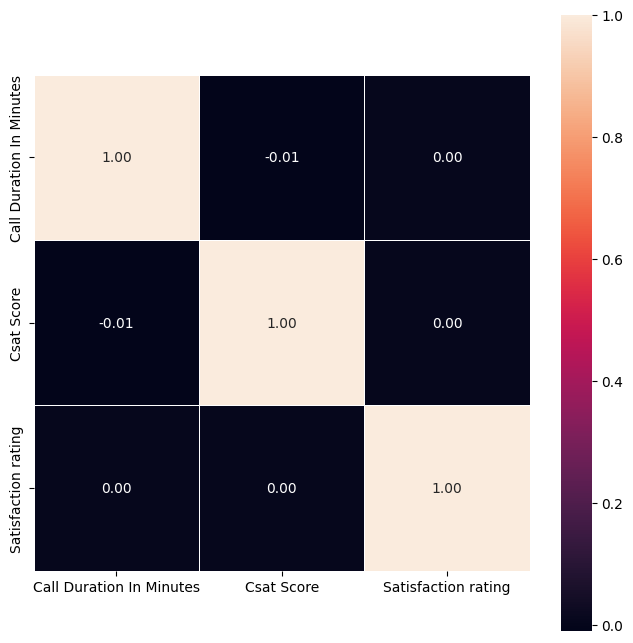

In [ ]:
corr=call.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True, fmt=".2f", annot_kws={"size": 10}, square=True, linewidths=0.5)

PERFORM EDA TO CALL DATASET

In [ ]:
call=call.drop(['Id', 'City','Employee Name',
        'Country', 'Region','Customer Name'],axis=1)

In [ ]:
call.head()

,Call Timestamp,Call-Centres City,Channel,Reason,Response Time,Sentiment,State,Call Duration In Minutes,Csat Score,Resolved,Satisfaction rating,Time
0,2024-02-20,Chennai,Chatbot,Billing Question,Within SLA,Negative,Tamil Nadu,41,NaN,Y,3,13:58:05
1,2024-02-27,Chennai,Chatbot,Billing Question,Within SLA,Negative,Tamil Nadu,42,NaN,Y,3,14:03:50
2,2024-02-02,Chennai,Call-Center,Billing Question,Within SLA,Negative,Tamil Nadu,10,NaN,N,3,15:34:34
3,2024-02-18,Chennai,Call-Center,Billing Question,Within SLA,Negative,Tamil Nadu,23,NaN,N,3,11:22:34
4,2024-02-19,Chennai,Call-Center,Billing Question,Within SLA,Negative,Tamil Nadu,40,NaN,Y,5,11:32:38


In [ ]:
call.isnull().sum()

Call Timestamp                  0
Call-Centres City               0
Channel                         0
Reason                          0
Response Time                   0
Sentiment                       0
State                           0
Call Duration In Minutes        0
Csat Score                  20670
Resolved                        0
Satisfaction rating             0
Time                            0
dtype: int64

In [ ]:
#fill null values in csat score

call['Csat Score'] = call['Csat Score'].fillna(call['Csat Score'].mean())


In [ ]:
call.isnull().sum()

Call Timestamp              0
Call-Centres City           0
Channel                     0
Reason                      0
Response Time               0
Sentiment                   0
State                       0
Call Duration In Minutes    0
Csat Score                  0
Resolved                    0
Satisfaction rating         0
Time                        0
dtype: int64

In [ ]:
call.duplicated().sum()

5

In [ ]:
# drop duplicates
call = call.drop_duplicates()


In [ ]:
call.duplicated().sum()

0

In [ ]:
# Segregate Numerical and Categorical Variables/Columns
numerical_columns = call.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = call.select_dtypes(include=['object','datetime64']).columns

call_numerical_columns=call[numerical_columns]
call_categorical_columns=call[categorical_columns]


In [ ]:
call_numerical_columns.head()

,Call Duration In Minutes,Csat Score,Satisfaction rating
0,41,5.548448,3
1,42,5.548448,3
2,10,5.548448,3
3,23,5.548448,3
4,40,5.548448,5


In [ ]:
call_categorical_columns.head()

,Call Timestamp,Call-Centres City,Channel,Reason,Response Time,Sentiment,State,Resolved,Time
0,2024-02-20,Chennai,Chatbot,Billing Question,Within SLA,Negative,Tamil Nadu,Y,13:58:05
1,2024-02-27,Chennai,Chatbot,Billing Question,Within SLA,Negative,Tamil Nadu,Y,14:03:50
2,2024-02-02,Chennai,Call-Center,Billing Question,Within SLA,Negative,Tamil Nadu,N,15:34:34
3,2024-02-18,Chennai,Call-Center,Billing Question,Within SLA,Negative,Tamil Nadu,N,11:22:34
4,2024-02-19,Chennai,Call-Center,Billing Question,Within SLA,Negative,Tamil Nadu,Y,11:32:38


CALCULATION TO FIND
1.TOTAL CALL DURATION UN MINUTES
2.TOTAL CALL DURATION IN HOURS
3.TOTAL CALLS
4.AVERAGE CALL DURATION IN MINUTES
5.RESPONSE TIME PERCENTAGE
6.SEPARATE DATE AND DAYS

In [ ]:
# Total call duration in minutes
total_call_duration_minutes = call['Call Duration In Minutes'].sum()
print("Total call duration in minutes:", total_call_duration_minutes)


Total call duration in minutes: 824092


In [ ]:
# total call duration in hours

total_call_duration_in_hours = total_call_duration_minutes / 60
print("Total call duration in hours:", total_call_duration_in_hours)


Total call duration in hours: 13734.866666666667


In [ ]:
# total calls
total_calls = call.shape[0] #total number of rows in our dataset
print("Total number of calls:", total_calls)


Total number of calls: 32936


In [ ]:
# average call duration in minutes
average_call_duration = total_call_duration_minutes / total_calls
print("Average call duration in minutes:", average_call_duration)


Average call duration in minutes: 25.021010444498422


In [ ]:
# Response Time percentage by within SLA and Above SLA from Response Time object column

# Calculate the percentage of calls within SLA and above SLA
within_sla_percentage = (call['Response Time'].apply(lambda x: 1 if x == 'Within SLA' else 0).sum() / call.shape[0]) * 100
above_sla_percentage = (call['Response Time'].apply(lambda x: 1 if x == 'Above SLA' else 0).sum() / call.shape[0]) * 100

# Print the percentages
print(f"The percentage of calls within SLA is {within_sla_percentage:.2f}%")
print(f"The percentage of calls Above SLA is {above_sla_percentage:.2f}%")

# add within_sla_percentage +above_sla_percentage
Response_time_percentage=within_sla_percentage + above_sla_percentage
print(f"The Response_time_percentage of calls is {Response_time_percentage:.2f}%")


The percentage of calls within SLA is 62.61%
The percentage of calls Above SLA is 12.65%
The Response_time_percentage of calls is 75.26%


In [ ]:
# separate date and days
call['Call Timestamp'] = pd.to_datetime(call['Call Timestamp'])
call['Date'] = call['Call Timestamp'].dt.date
call['Day'] = call['Call Timestamp'].dt.day_name()
call['Day_num'] = call['Day'].apply(lambda x: ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'].index(x))
call.head()


,Call Timestamp,Call-Centres City,Channel,Reason,Response Time,Sentiment,State,Call Duration In Minutes,Csat Score,Resolved,Satisfaction rating,Time,Date,Day,Day_num
0,2024-02-20,Chennai,Chatbot,Billing Question,Within SLA,Negative,Tamil Nadu,41,5.548448,Y,3,13:58:05,2024-02-20,Tuesday,1
1,2024-02-27,Chennai,Chatbot,Billing Question,Within SLA,Negative,Tamil Nadu,42,5.548448,Y,3,14:03:50,2024-02-27,Tuesday,1
2,2024-02-02,Chennai,Call-Center,Billing Question,Within SLA,Negative,Tamil Nadu,10,5.548448,N,3,15:34:34,2024-02-02,Friday,4
3,2024-02-18,Chennai,Call-Center,Billing Question,Within SLA,Negative,Tamil Nadu,23,5.548448,N,3,11:22:34,2024-02-18,Sunday,6
4,2024-02-19,Chennai,Call-Center,Billing Question,Within SLA,Negative,Tamil Nadu,40,5.548448,Y,5,11:32:38,2024-02-19,Monday,0


VISUALIZATION FOR CALL DATASET:
  1) TOTAL CALLS PER DAY
  2) TOTAL CALLS PER REASON
  3) TOTAL CALLS PER CHANNEL
  4) TOTAL CALLS BY CALL CENTRE CITY
  5) TOTAL CALLS BY SENTIMENT

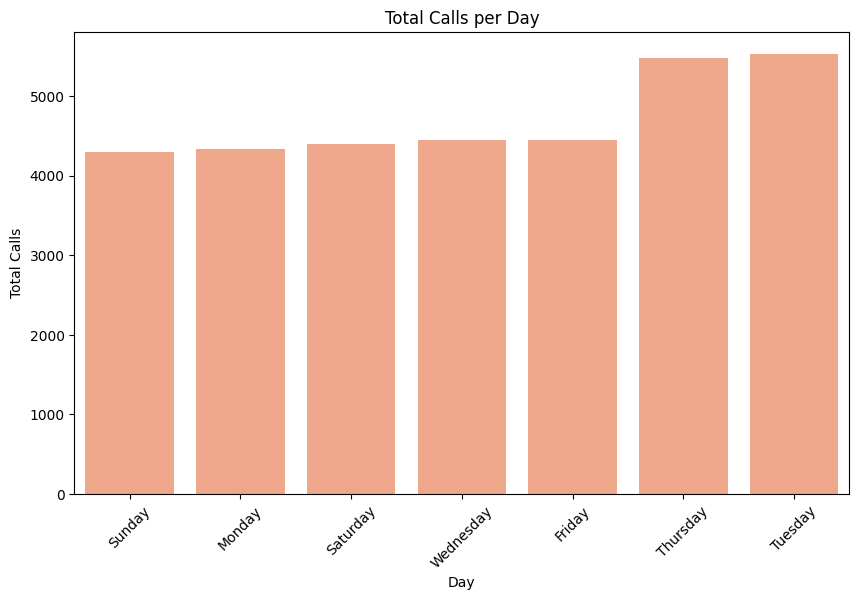

In [ ]:
# Total calls per day
total_calls_per_day = call.groupby('Day')['Call Duration In Minutes'].count().sort_values(ascending=True)

# Plot the total calls per day
plt.figure(figsize=(10, 6))
sns.barplot(x=total_calls_per_day.index, y=total_calls_per_day.values,color='lightsalmon')
plt.xlabel('Day')
plt.ylabel('Total Calls')
plt.title('Total Calls per Day')
plt.xticks(rotation=45)
plt.show()


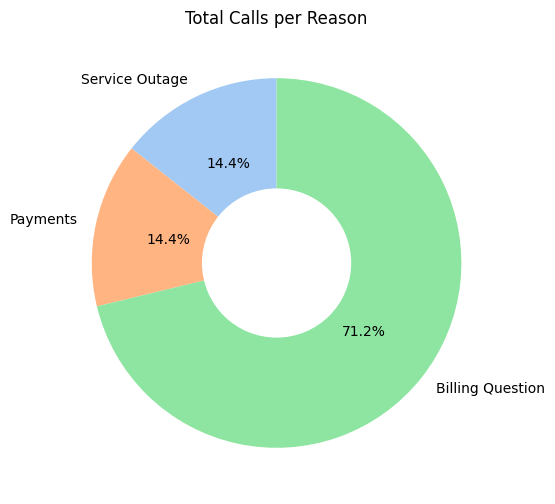

In [ ]:
# Total calls per reason using pie plot
total_calls_per_reason = call.groupby('Reason')['Call Duration In Minutes'].count().sort_values(ascending=True)

# Get the colors from the sns.color_palette()
colors = sns.color_palette('pastel')[0:len(total_calls_per_reason)]

# Create the pie chart
plt.figure(figsize=(10, 6))
plt.pie(total_calls_per_reason, labels=total_calls_per_reason.index, autopct='%1.1f%%', colors=colors, startangle=90)
circle=plt.Circle(xy=(0,0),radius=0.4,color='white')
plt.gcf()
plt.gca().add_artist(circle)
plt.title('Total Calls per Reason')
plt.show()


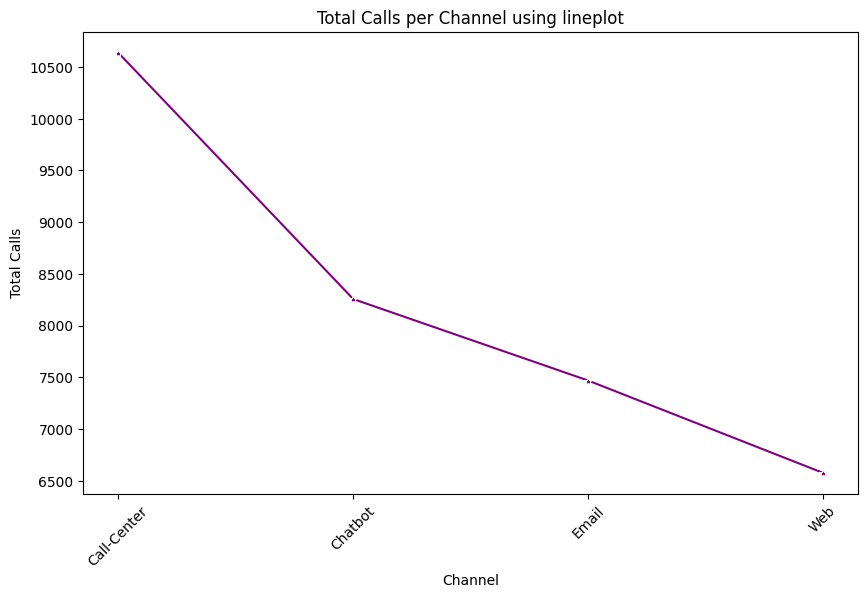

In [ ]:
# Total calls per channel using lineplot
total_calls_per_channel = call.groupby('Channel')['Call Duration In Minutes'].count()

# Plot the total calls per channel using lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(x=total_calls_per_channel.index, y=total_calls_per_channel.values,marker= "*",color='purple')
plt.xlabel('Channel')
plt.ylabel('Total Calls')
plt.title('Total Calls per Channel using lineplot')
plt.xticks(rotation=45)
plt.show()


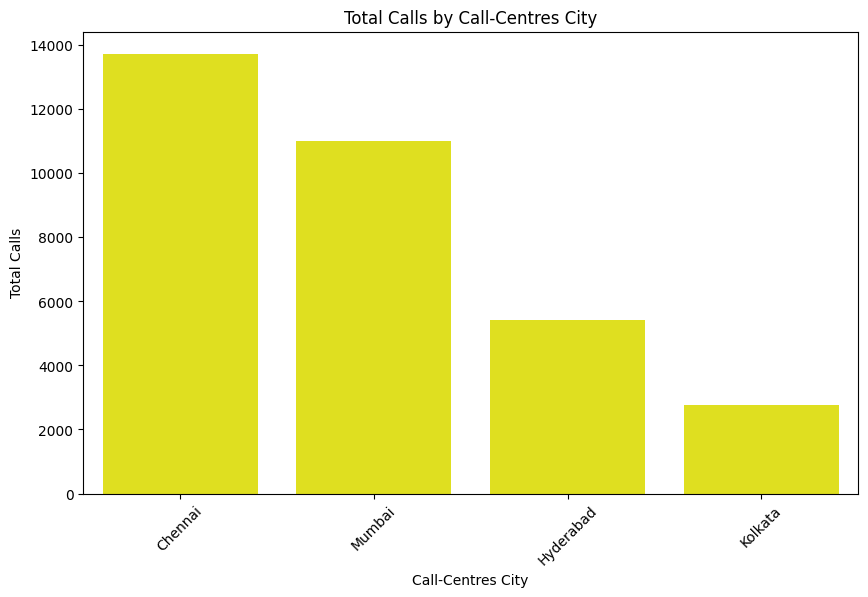

In [ ]:
# Total calls by Call-Centres City
total_calls_by_city = call.groupby('Call-Centres City')['Call Duration In Minutes'].count().sort_values(ascending=False)

# Plot the total calls by Call-Centres City
plt.figure(figsize=(10, 6))
sns.barplot(x=total_calls_by_city.index, y=total_calls_by_city.values,color='yellow')
plt.xlabel('Call-Centres City')
plt.ylabel('Total Calls')
plt.title('Total Calls by Call-Centres City')
plt.xticks(rotation=45)
plt.show()


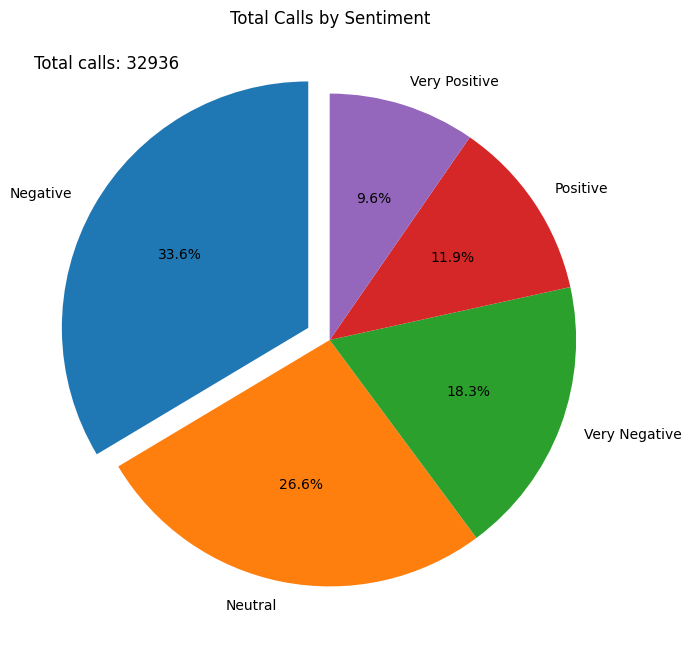

In [ ]:
# Total calls by sentiment
sentiment_counts = call['Sentiment'].value_counts()
explode=(0.1,0,0,0,0)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90,explode=explode)
plt.title('Total Calls by Sentiment')

# Add details in the outside top corner of the diagram
plt.text(-1.2, 1.1, f'Total calls: {call.shape[0]}', fontsize=12)

plt.show()
